<a href="https://colab.research.google.com/github/mohitsharmas97/revision/blob/main/uciheart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [308]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'heart-disease-data' dataset.
Path to dataset files: /kaggle/input/heart-disease-data


In [309]:
cd /kaggle/input/heart-disease-data

/kaggle/input/heart-disease-data


In [310]:
ls

heart_disease_uci.csv


In [311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [312]:
df=pd.read_csv('heart_disease_uci.csv')


In [313]:
df.head(3)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1


In [314]:
df.shape

(920, 16)

In [315]:
df.isnull().sum()*100/df.shape[0]

,0
id,0.000000
age,0.000000
sex,0.000000
dataset,0.000000
cp,0.000000
trestbps,6.413043
chol,3.260870
fbs,9.782609
restecg,0.217391
thalch,5.978261


In [316]:
# Identify columns with more than 50% null values
null_percentages = df.isnull().sum() * 100 / df.shape[0]
cols_to_drop = null_percentages[null_percentages > 50].index.tolist()

# Drop the identified columns
df= df.drop(columns=cols_to_drop)

# Fill remaining null values (using forward fill as an example, you might choose a different method)
df= df.fillna(method='ffill')

# Display the number of nulls after cleaning
print("Null values after cleaning:")
print(df.isnull().sum())

Null values after cleaning:
id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
num         0
dtype: int64


/tmp/ipython-input-2226710441.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill')
/tmp/ipython-input-2226710441.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df= df.fillna(method='ffill')


In [317]:
df.shape


(920, 14)

In [318]:
df.head(3)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,1


In [319]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,num
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,460.500000,53.510870,132.402174,201.026087,136.648913,0.896957,0.995652
std,265.725422,9.424685,18.965153,110.746323,25.889604,1.097267,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,230.750000,47.000000,120.000000,177.000000,119.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,139.500000,0.500000,1.000000
75%,690.250000,60.000000,142.000000,268.250000,156.000000,1.500000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


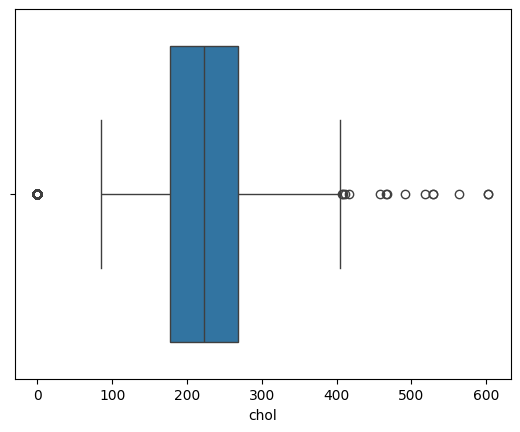

In [320]:
sns.boxplot(x="chol",data=df)
plt.show()

In [321]:
q1=df["chol"].quantile(0.25)
q3=df["chol"].quantile(0.75)

In [322]:
IQR=q3-q1
min_range=q1-(1.5*IQR)
max_range=q3+(1.5*IQR)
IQR

np.float64(91.25)

In [323]:
min_range,max_range

(np.float64(40.125), np.float64(405.125))

In [324]:
new_df=df[df["chol"]<=max_range]

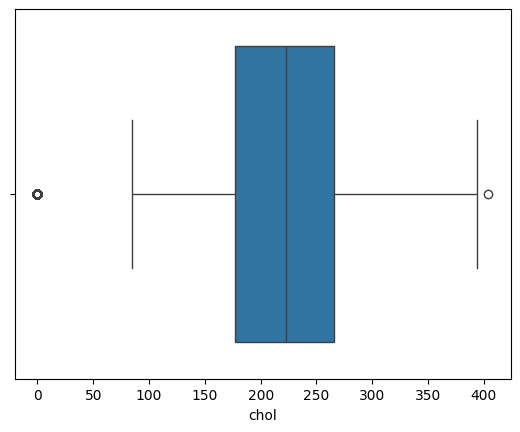

In [325]:
sns.boxplot(x="chol",data=new_df)
plt.show()

In [326]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # 1. Distribution of age
# sns.histplot(df['age'], bins=20, kde=True)
# plt.show()

# # 2. Countplot of chest pain types vs target
# sns.countplot(x='cp', hue='num', data=df)
# plt.show()

# # 3. Boxplot of cholesterol vs target
# sns.boxplot(x='num', y='chol', data=df)
# plt.show()

# # 4. Correlation heatmap
# plt.figure(figsize=(10,6))
# sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
# plt.show()

# # 5. Target distribution
# sns.countplot(x='num', data=df)
# plt.show()


In [327]:
new_df.head(3)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,1


In [335]:
print("Converting target variable 'num' to binary (0 or 1)...")
new_df['num'] = new_df['num'].apply(lambda x: 1 if x > 0 else 0)

Converting target variable 'num' to binary (0 or 1)...


In [336]:
new_df=new_df.drop(columns=['id', 'dataset'])

In [337]:
categorical_cols=['cp','fbs','sex','restecg','exang','slope','thal']
categorical_cols = [col for col in categorical_cols if col in new_df.columns]

# Apply one-hot encoding
new_df = pd.get_dummies(new_df, columns=categorical_cols, drop_first=True)

In [338]:
new_df.head()

,age,trestbps,chol,thalch,oldpeak,num,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,sex_Male,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping
0,63,145.0,233.0,150.0,2.3,0,False,False,True,True,True,False,False,False,False,False
1,67,160.0,286.0,108.0,1.5,1,False,False,False,False,True,False,False,True,True,False
2,67,120.0,229.0,129.0,2.6,1,False,False,False,False,True,False,False,True,True,False
3,37,130.0,250.0,187.0,3.5,0,False,True,False,False,True,True,False,False,False,False
4,41,130.0,204.0,172.0,1.4,0,True,False,False,False,False,False,False,False,False,True


In [339]:
x=new_df.drop(columns=['num'])
y=new_df['num']

In [341]:
y

,num
0,0
1,1
2,1
3,0
4,0
...,...
915,1
916,0
917,1
918,0


In [342]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [343]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [344]:
from sklearn.linear_model import LogisticRegression

In [345]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [350]:
lr.score(x_test,y_test),lr.score(x_train,y_train)

(0.8241758241758241, 0.8204419889502762)

In [347]:
from sklearn.ensemble import RandomForestClassifier

In [348]:
model = RandomForestClassifier(n_estimators=100, max_depth=5,random_state=42)
model.fit(x_train, y_train)



RandomForestClassifier(max_depth=5, random_state=42)

In [349]:
model.score(x_test,y_test),model.score(x_train,y_train)

(0.8351648351648352, 0.8632596685082873)

In [351]:
# First, you might need to install the library:
# !pip install xgboost

from xgboost import XGBClassifier

# Create and train the model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(x_train, y_train)

# Evaluate the model
print("XGBoost Test Accuracy:", xgb_model.score(x_test, y_test))
print("XGBoost Train Accuracy:", xgb_model.score(x_train, y_train))

XGBoost Test Accuracy: 0.8406593406593407
XGBoost Train Accuracy: 1.0


In [352]:
from sklearn.svm import SVC

# Create and train the model (the 'rbf' kernel is great for non-linear data)
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(x_train, y_train)

# Evaluate the model
print("SVM Test Accuracy:", svm_model.score(x_test, y_test))
print("SVM Train Accuracy:", svm_model.score(x_train, y_train))

SVM Test Accuracy: 0.8351648351648352
SVM Train Accuracy: 0.8770718232044199
